In [13]:
 from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [14]:
import pandas as pd


In [15]:
dataset = pd.read_csv('data/heart.csv')


In [16]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [17]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np




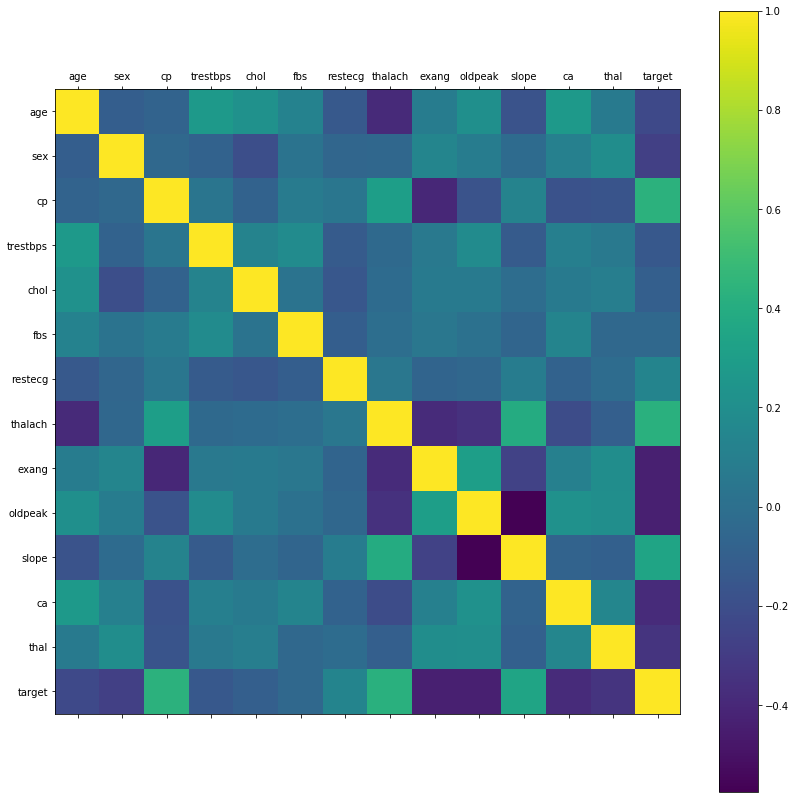

In [19]:
# print(dataset.shape[1])
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e97455ef0>,
      dtype=object)

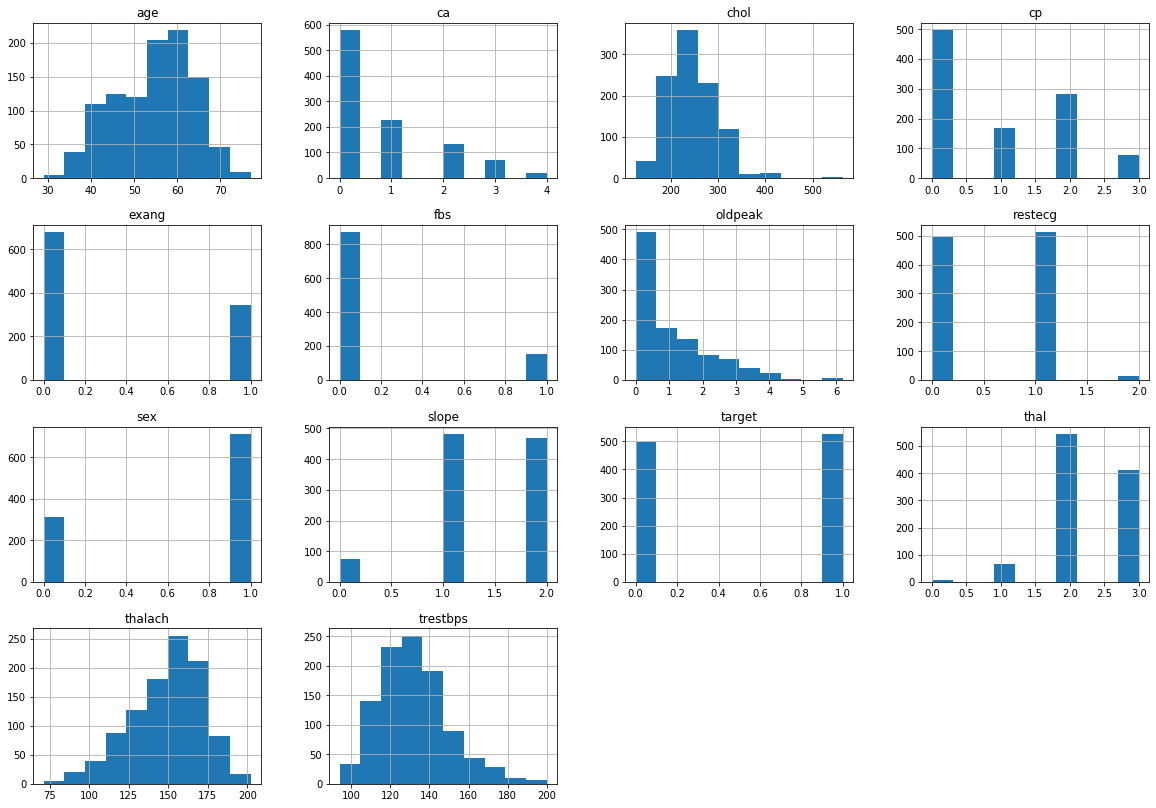

In [20]:

dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

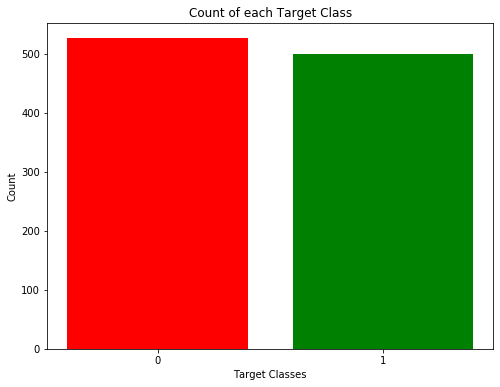

In [21]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')


In [22]:

print(dataset)

dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
#dataset.info()
print(dataset)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [23]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

data_scaler = standardScaler.fit(dataset[columns_to_scale])
dataset[columns_to_scale] = data_scaler.transform(dataset[columns_to_scale])

from joblib import dump
dump(data_scaler,'data_scaler')
print(dataset)

           age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    -0.268437 -0.377636 -0.659332  0.821321 -0.060888       0      0      1   
1    -0.158157  0.479107 -0.833861  0.255968  1.727137       0      0      1   
2     1.716595  0.764688 -1.396233 -1.048692  1.301417       0      0      1   
3     0.724079  0.936037 -0.833861  0.516900 -0.912329       0      0      1   
4     0.834359  0.364875  0.930822 -1.874977  0.705408       0      1      0   
...        ...       ...       ...       ...       ...     ...    ...    ...   
1020  0.503520  0.479107 -0.484803  0.647366 -0.912329       1      0      1   
1021  0.613800 -0.377636  0.232705 -0.352873  1.471705       0      0      1   
1022 -0.819834 -1.234378  0.562371 -1.353113 -0.060888       0      0      1   
1023 -0.488996 -1.234378  0.155137  0.429923 -0.912329       1      1      0   
1024 -0.047877 -0.663216 -1.124743 -1.570556  0.279688       0      0      1   

      cp_0  cp_1  ...  slope_2  ca_0  c

In [24]:
dataset.to_pickle("1000Rows")